# 회귀 모델 판별식
* 1 ~ 10까지 데이터로 학습한 후 101 ~ 110까지 예측하기
* __평균 제곱근 오차 - RMSE(Root Mean Squared Error)__ 
    - 회귀 분석을 평가할 때 가장 많이 사용하는 지표 중에 하나
    - MSE에 루트를 사용
    - 원래 데이터에서 평균을 뺀 값을 제곱하여 모두 더한 뒤 전체 개수로 나눈 값에 루트를 씌운 것
    - RMSE는 낮을수록 정밀도가 높음
* __결정 계수(R2)__
    - 회귀 분석에서 많이 사용하는 지표 중에 하나
    - RMSE와 반대로 높을수록 좋은 지표
    - 0~1사이의 수치 - 0.73 정도의 값이 나오면 73%의 설명력을 가진다고 해석 
    - 사이킷런에서 r2_score 함수로 제공 
    - 만약 R2의 값이 음수가 나오면 학습 시 머신에 뭔가 잘못된 부분이 존재한다는 의미 

## 0 사용할 패키지 불러오기 

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random

## 1. 데이터셋 생성하기
* 학습 데이터 
* 테스트 데이터

In [2]:
x_train = np.array([1,2,3,4,5,6,7,8,9,10])
y_train = np.array([1,2,3,4,5,6,7,8,9,10])
x_test = np.array([101,102,103,104,105,106,107,108,109,110])
y_test = np.array([101,102,103,104,105,106,107,108,109,110])

## 2. 모델 구성하기
* Dense 레이어가 두 개인 다층퍼셉트론 모델. 
* 첫 번째 레이어는 5개의 뉴런을 가진 Dense 레이어
    - 오류역전파가 용이한 relu 활성화 함수를 사용.
* 두 번째 레이어는 3개의 뉴런을 가진 Dense 레이어 
* 출력 레이어인 세 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수는 relu를 사용

In [3]:
model = Sequential()
model.add(Dense(5, input_dim =1 , activation='relu'))
model.add(Dense(3))
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


## 3. 모델 학습과정 설정하기
#### 모델 컴파일
* 모델을 실행시키지 전에 머신이 이해할 수 있도록 컴파일 시킴
* loss : 손실 마수는 어떤 것을 사용할 것인가? --> mse
* optimizer : 최적화 함수는? --> adam, rmsprop
* metrics : 어떤 방식? --> accuracy, mse(mean squared error) 적용 

In [4]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

## 4. 모델 학습시키기
* epochs : 훈련 횟수
* batch_size : 몇 개씩 끊어서 작업을 할 것인가를 의미 
    - batch_size를 크게 잡을 경우 속도가 빨라지지만 정확도가 떨어짐
    - 작게 잡을 경우 속도는 떨어지지만 정확도는 올라감
* valication_data : 검증 데이터 

In [5]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=1,validation_data = (x_test, y_test))

Train on 10 samples, validate on 10 samples
Epoch 1/100
10/10 [==============================] - 1s 54ms/sample - loss: 1.5121 - mse: 1.5121 - val_loss: 331.3703 - val_mse: 331.3703
Epoch 2/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.7823 - mse: 0.7823 - val_loss: 171.3065 - val_mse: 171.3065
Epoch 3/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.3044 - mse: 0.3044 - val_loss: 82.3754 - val_mse: 82.3754
Epoch 4/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.1144 - mse: 0.1144 - val_loss: 33.3586 - val_mse: 33.3586
Epoch 5/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.0373 - mse: 0.0373 - val_loss: 12.4010 - val_mse: 12.4010
Epoch 6/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.0080 - mse: 0.0080 - val_loss: 6.4283 - val_mse: 6.4283
Epoch 7/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.0083 - mse: 0.0083 - val_loss: 4.7243 - val_mse: 4.7243
Epoch 8/10

10/10 [==============================] - 0s 3ms/sample - loss: 1.2479e-04 - mse: 1.2479e-04 - val_loss: 0.1136 - val_mse: 0.1136
Epoch 61/100
10/10 [==============================] - 0s 3ms/sample - loss: 1.1088e-04 - mse: 1.1088e-04 - val_loss: 0.0961 - val_mse: 0.0961
Epoch 62/100
10/10 [==============================] - 0s 3ms/sample - loss: 1.0205e-04 - mse: 1.0205e-04 - val_loss: 0.0828 - val_mse: 0.0828
Epoch 63/100
10/10 [==============================] - 0s 3ms/sample - loss: 9.1852e-05 - mse: 9.1852e-05 - val_loss: 0.0862 - val_mse: 0.0862
Epoch 64/100
10/10 [==============================] - 0s 3ms/sample - loss: 8.2607e-05 - mse: 8.2607e-05 - val_loss: 0.0809 - val_mse: 0.0809
Epoch 65/100
10/10 [==============================] - 0s 3ms/sample - loss: 7.1875e-05 - mse: 7.1875e-05 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 66/100
10/10 [==============================] - 0s 3ms/sample - loss: 6.3051e-05 - mse: 6.3051e-05 - val_loss: 0.0519 - val_mse: 0.0519
Epoch 67/100
10/10 

## 5. 학습과정 살펴보기

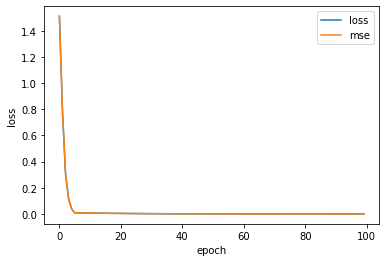

In [11]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['mse'])
#plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse'], loc='upper right')
plt.show()

## 6. 모델 평가하기

In [7]:
loss, mse = model.evaluate(x_test, y_test, batch_size =1)
print("loss : ", loss)
print("mse : ", mse )

10/10 [==============================] - 0s 1ms/sample - loss: 4.3142e-04 - mse: 4.3142e-04
loss :  0.0004314174468163401
mse :  0.00043141743


## 7. 예측하기 

In [8]:
y_predict = model.predict(x_test)
print("결과물 : \n", y_predict)

결과물 : 
 [[101.01982 ]
 [102.02002 ]
 [103.02024 ]
 [104.020454]
 [105.02065 ]
 [106.020874]
 [107.02107 ]
 [108.021286]
 [109.02149 ]
 [110.021706]]


#### RMSE 구하기

In [9]:
from sklearn.metrics import mean_squared_error
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE : ", RMSE(y_test, y_predict))

RMSE :  0.020770590911583137


#### R2 구하기

In [10]:
from sklearn.metrics import r2_score
r2_y_predict = r2_score(y_test, y_predict)
print("R2 : ", r2_y_predict)

R2 :  0.9999477069761434
